In [1]:
import pandas as pd

These data were downloaded from the Alabama Power web site in CSV format.

Regrettably, the web site only allowed me (at least when I tried this in Jan 2020) to retrieve history back to about 2018, but I had previously downloaded my electricity usage and billing history and, happily, these histories overlapped such that I could manually assemble (vi text editor) a single history file, going back to 2016, which we use here in this notebook.

In [2]:
df = pd.read_csv("History-AL_Power-Jan_2016-Jan_2021.csv", parse_dates=["Date"])
df.head()

,Date,Description,Usage (kWh),Amount
0,2021-01-25,Bill,696.0,$108.09
1,2021-01-07,Payment,NaN,$103.36
2,2020-12-22,Bill,683.0,$103.36
3,2020-12-04,Payment,NaN,$105.80
4,2020-11-20,Bill,702.0,$105.80


In [3]:
# Subset these data to the most useful bits.
usage_data = df[df['Description'] == 'Bill']
del usage_data["Description"] # No longer very useful after boolean array subset, so let's remove.
usage_data.head()

,Date,Usage (kWh),Amount
0,2021-01-25,696.0,$108.09
2,2020-12-22,683.0,$103.36
4,2020-11-20,702.0,$105.80
6,2020-10-22,725.0,$86.32
8,2020-09-22,1457.0,$208.50


In [4]:
usage_data.describe()

,Usage (kWh)
count,61.000000
mean,951.262295
std,484.252617
min,413.000000
25%,537.000000
50%,725.000000
75%,1360.000000
max,2096.000000


In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [6]:
# Grab the column names so I don't have to type them in for the plot and risk a typo.
cols = list(usage_data.columns)
print(cols)

['Date', 'Usage (kWh)', 'Amount']


In [12]:
sns.set_style("darkgrid")

<AxesSubplot:title={'center':'Electricity usage'}, xlabel='Date', ylabel='Usage (kWh)'>

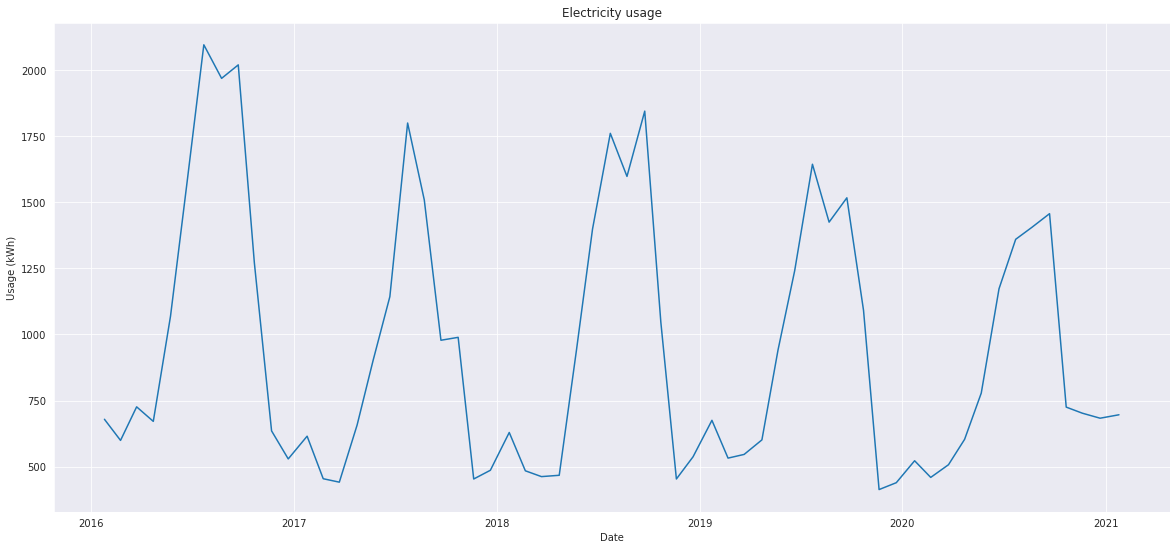

In [13]:
plt.figure(figsize=(20, 9))
plt.title("Electricity usage")
sns.lineplot(x=usage_data.Date, y=usage_data[cols[1]])

In [18]:
# See https://stackoverflow.com/a/40770463, couldn't get that to work right away.
# Implement the standard approach described in Ch 10.1 of Python for Data Analysis book for now.
total_usage = usage_data.groupby([ts.year for ts in usage_data.Date]).sum()
total_usage

,Usage (kWh)
2016,13843.0
2017,10428.0
2018,11621.0
2019,11065.0
2020,10374.0
2021,696.0
